In [1]:
import uproot
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import zfit
import zfit.z.numpy  
from zfit import z 
import iminuit
import warnings
warnings.filterwarnings("ignore")

#Two muon IDs >0.6
#gamme_E_cms>0.2 GeV
#gamma within CDC acceptance
#ap_theta > 0.175 rad and <2.9 rad
# chi2 > 0


#MC15-mumu:
#/pnfs/desy.de/belle/local/belle/MC/release-06-01-08/DB00002649/MC15rd_b/prod00027831/s00/e0026/4S/r01968/mumu/mdst/sub00/mdst_000001_prod00027831_task251967000001.root


/home/sahil/anaconda3/lib/python3.10/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [2]:
signame = ['Signal_0.4GeV.root',
           'Signal_0.6GeV.root',
           'Signal_0.8GeV.root',
           'Signal_1GeV.root',
           'Signal_2GeV.root',
           'Signal_4GeV.root',
           'Signal_6GeV.root',
           'Signal_8GeV.root',
           'Signal_9GeV.root'
          ]

sigmag = ['0.4 GeV', '0.6 GeV', '0.8 GeV', '1.0 GeV', '2.0 GeV', '4.0 GeV', '6.0 GeV', '8.0 GeV', '9.0 GeV']

datsig = [uproot.open(x) for x in signame]

filesig = [x['mumu'].arrays(library='np') for x in datsig]

#mcname = ['Output_MC15_V2_mumu.root']

#datmc = [uproot.open(x) for x in mcname]

#filemc = [x['mumu'].arrays(library='np') for x in datmc]

file = filesig

print("0.4 GeV Signal:", len(file[0]['__experiment__']))
print("0.6 GeV Signal:", len(file[1]['__experiment__']))
print("0.8 GeV Signal:", len(file[2]['__experiment__']))
print("1.0 GeV Signal:", len(file[3]['__experiment__']))
print("2.0 GeV Signal:", len(file[4]['__experiment__']))
print("4.0 GeV Signal:", len(file[5]['__experiment__']))
print("6.0 GeV Signal:", len(file[6]['__experiment__']))
print("8.0 GeV Signal:", len(file[7]['__experiment__']))
print("9.0 GeV Signal:", len(file[8]['__experiment__']))

0.4 GeV Signal: 2442
0.6 GeV Signal: 2247
0.8 GeV Signal: 2021
1.0 GeV Signal: 2046
2.0 GeV Signal: 2120
4.0 GeV Signal: 2503
6.0 GeV Signal: 2532
8.0 GeV Signal: 2594
9.0 GeV Signal: 2523


In [3]:
mcname = ['Output_MC15_V2_mumu.root']

datmc = [uproot.open(x) for x in mcname]

filemc = [x['mumu'].arrays(library='np') for x in datmc]



In [6]:
col = sns.color_palette('magma_r', len(file)+1)

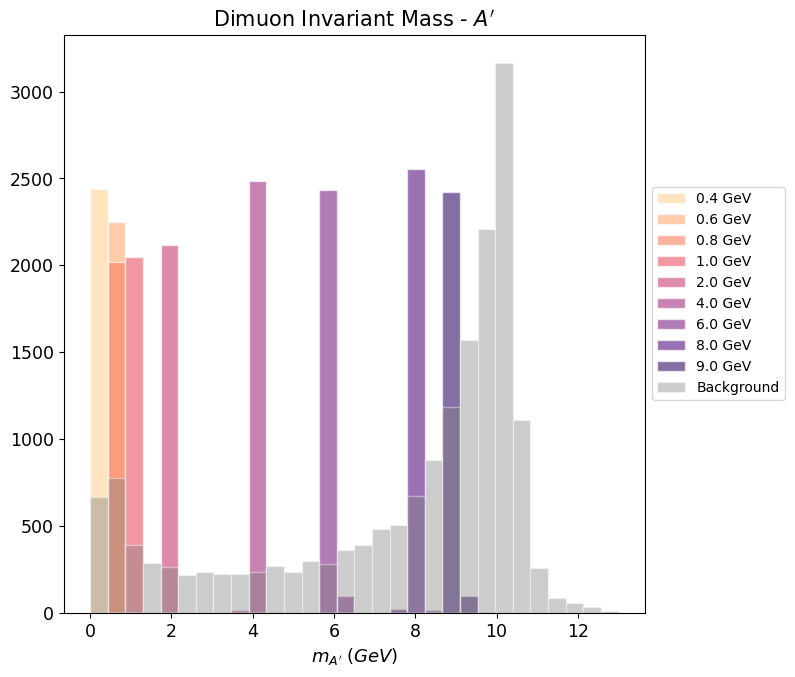

In [22]:
i = 0

fig, ax = plt.subplots(1,1, figsize = (7.5,7.5))
ax.tick_params(axis='both', labelsize=12.5)

for x in file:
    ax.hist(x['ap_InvM'], range = [0,13], bins = 30, label = sigmag[i], color = col[i],alpha = 0.6, edgecolor = 'white')
    i = i + 1
for y in filemc:
    ax.hist(y['ap_InvM'], range = [0,13], bins = 30, label = 'Background', color = 'gray',alpha = 0.4, edgecolor = 'white')
ax.legend(bbox_to_anchor=(1, 0.75))
ax.set_xlabel(r"$m_{A'}\;(GeV)$", fontsize = 13)
ax.set_ylabel('')
ax.set_title("Dimuon Invariant Mass - $A'$", fontsize = 15)
fig.show()

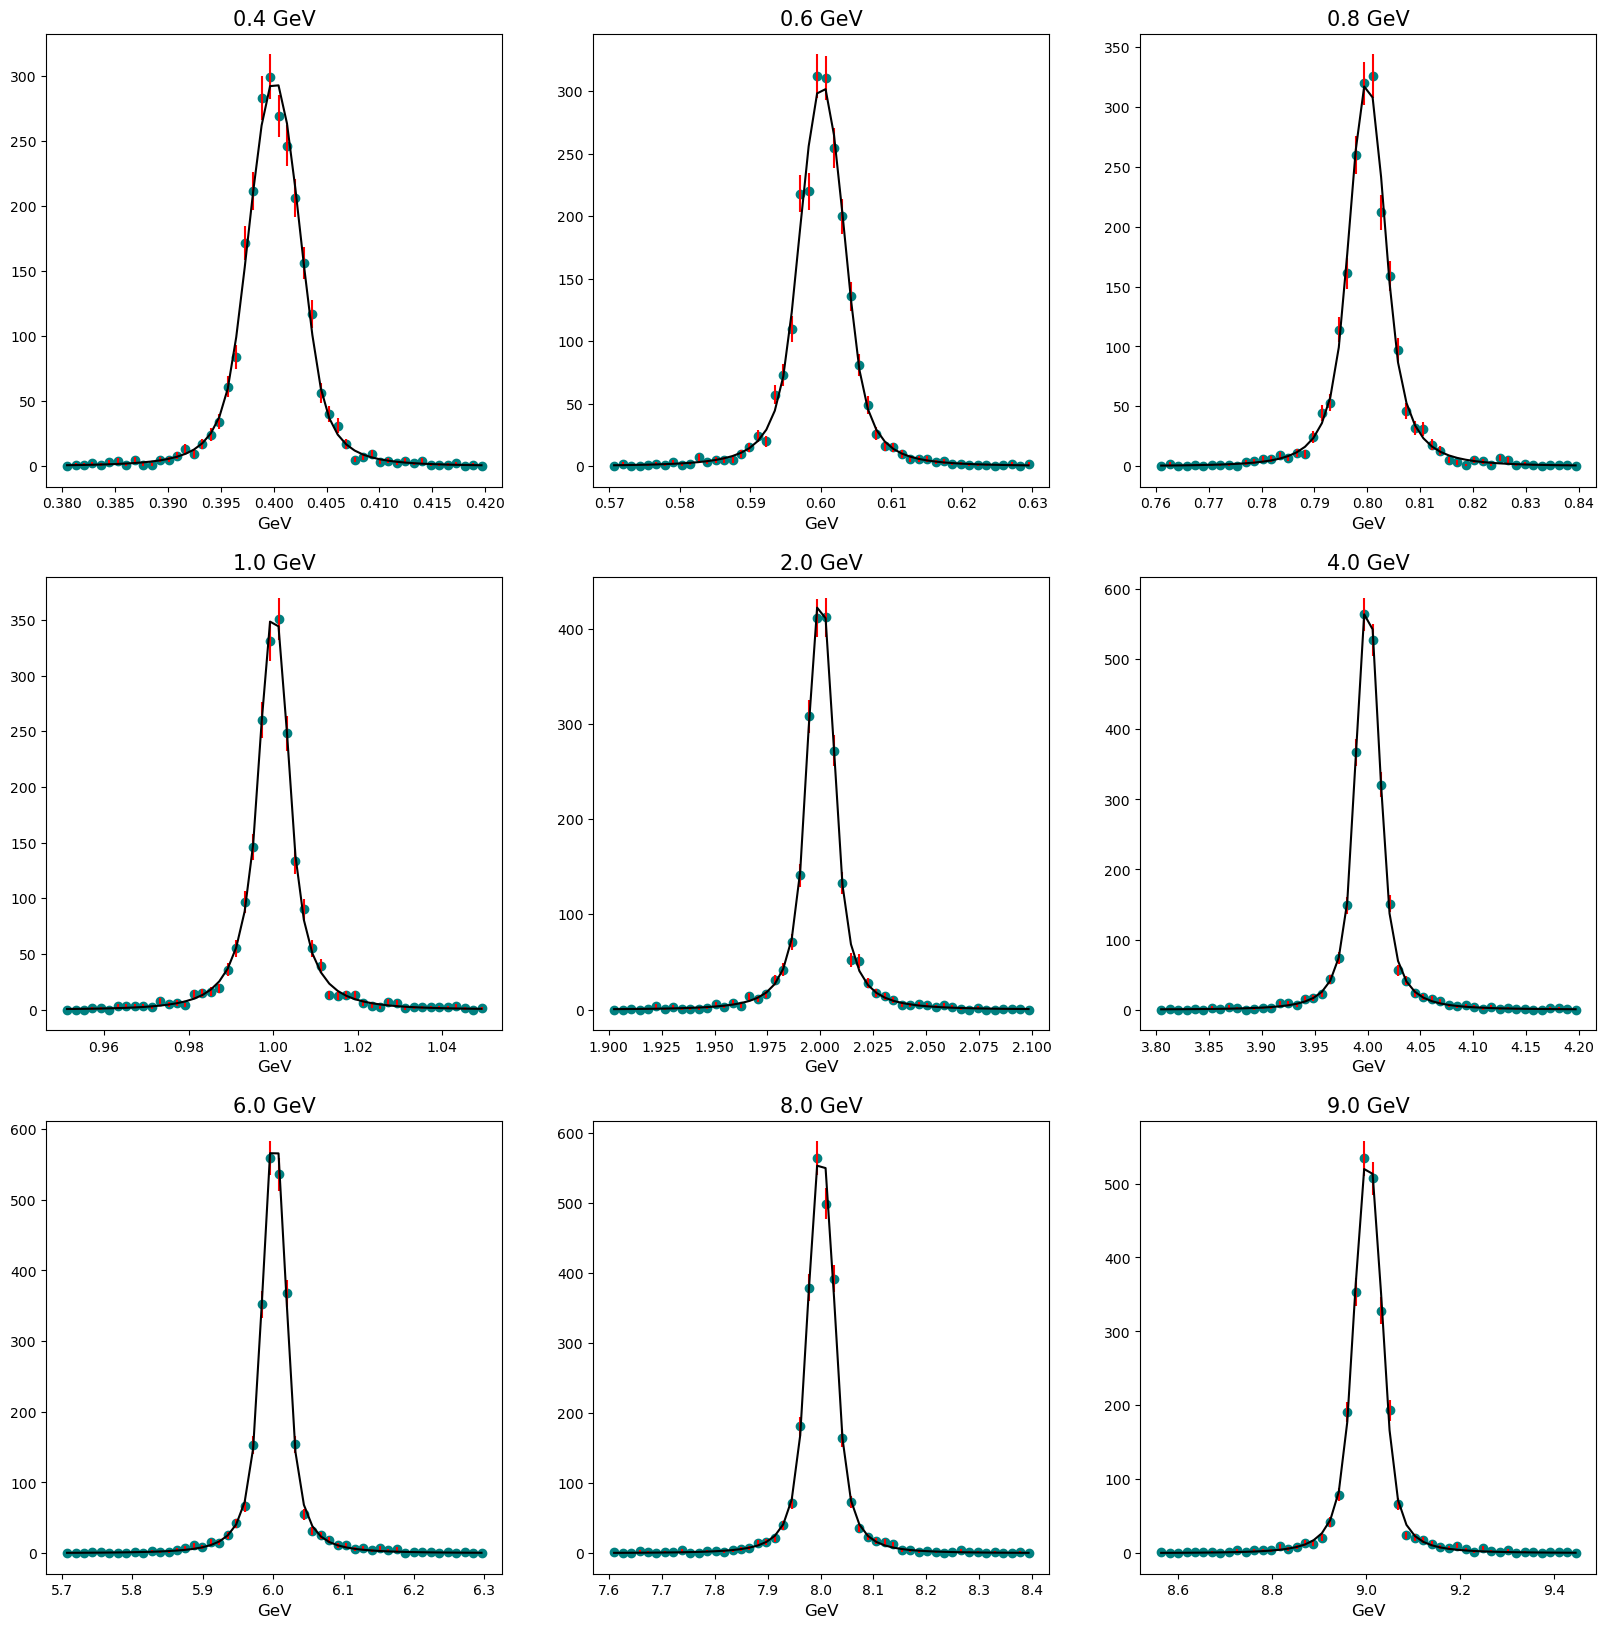

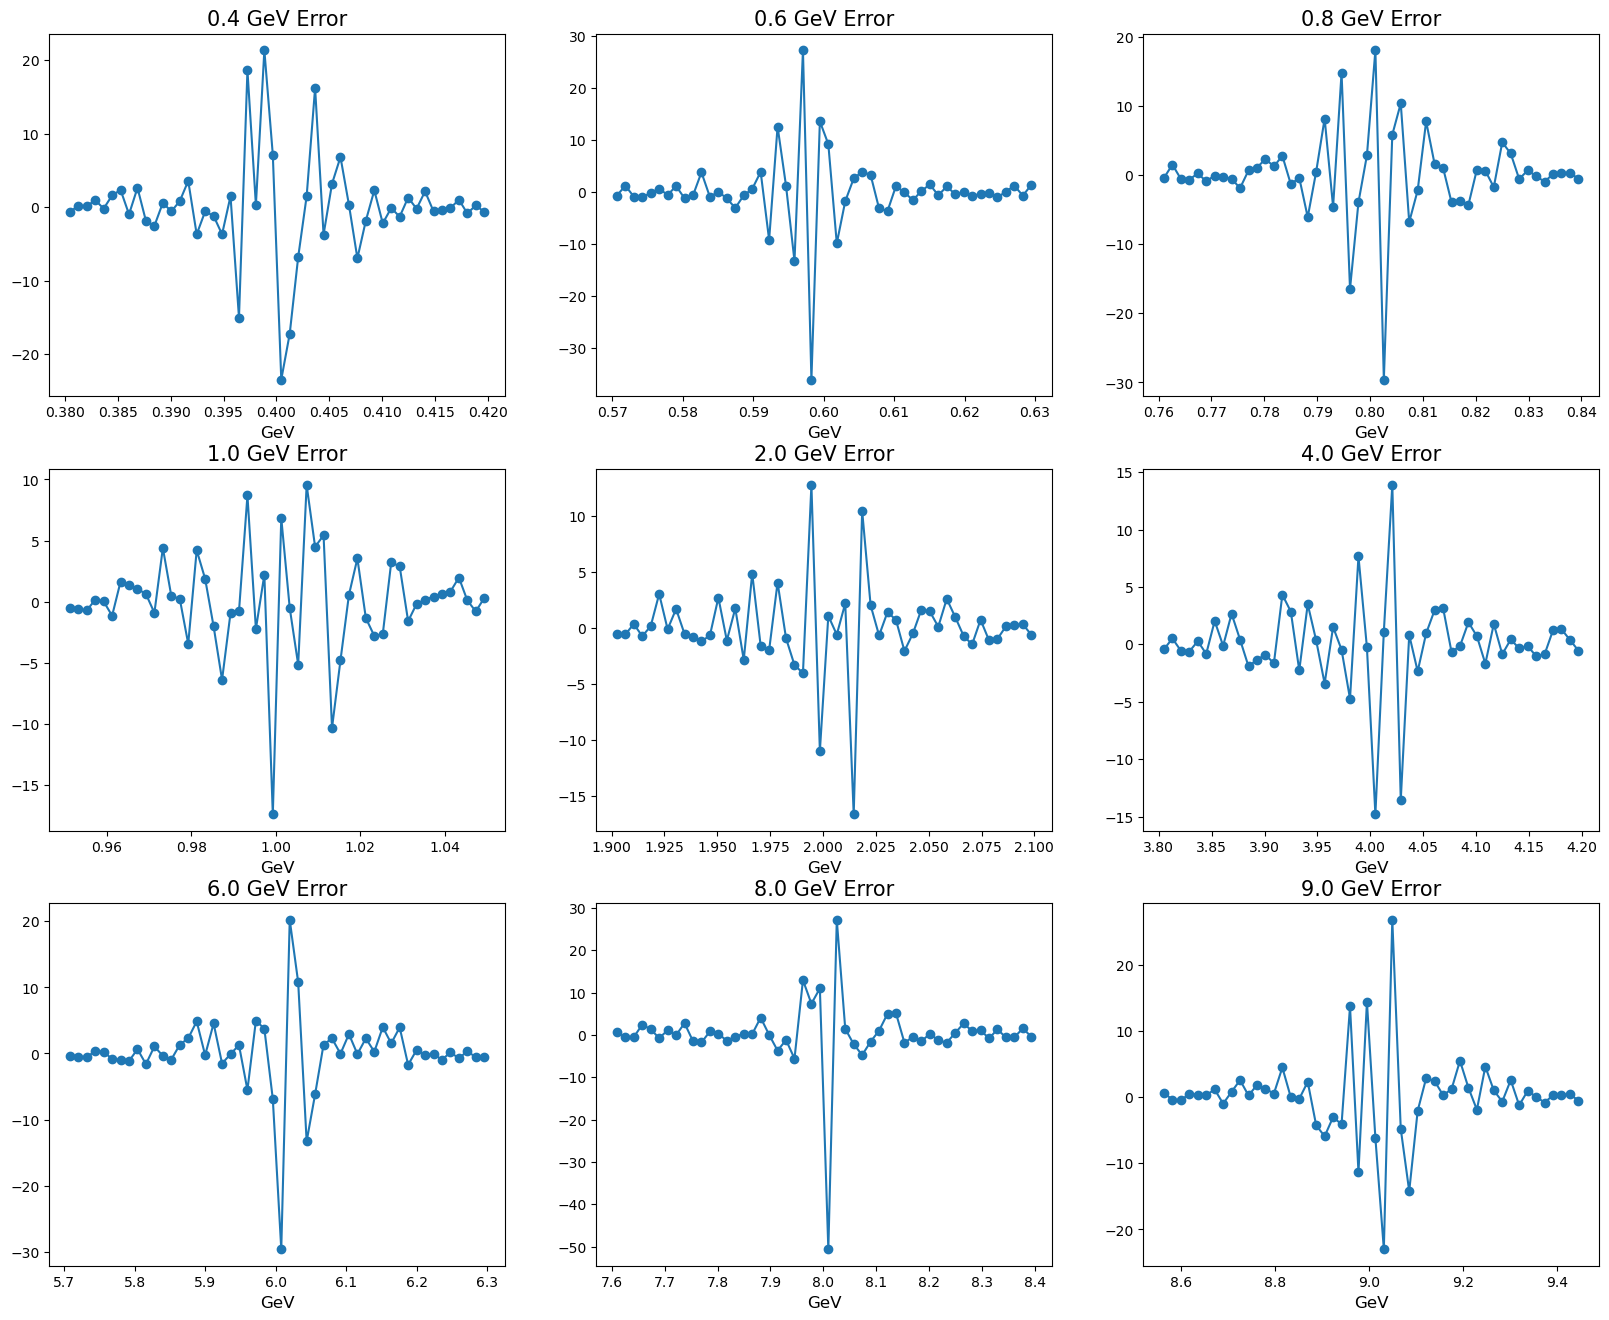

In [5]:
m = [0,0,0,1,1,1,2,2,2]
n = [0,1,2,0,1,2,0,1,2]

fig, ax = plt.subplots(3,3, figsize = (20,20))
fig_, ax_ = plt.subplots(3,3, figsize = (20,16))

muarr = []
sigmaarr = []
alphalarr = []
nlarr = []
alphararr = []
nrarr = []

for i in range(len(file)):  
    y = file[i]['ap_InvM']
    
#     mu = zfit.Parameter("mu", np.mean(y))
#     sigma = zfit.Parameter("sigma", 0.005)
#     alphal = zfit.Parameter("alphal", 1)
#     nl = zfit.Parameter("nl", 1) 
#     alphar = zfit.Parameter("alphar", 1)
#     nr = zfit.Parameter("nr", 1) 

    obs = zfit.Space('x', limits=(-1, 12))
    data = zfit.data.Data.from_numpy(obs=obs, array=y)


    dcb = zfit.pdf.DoubleCB(obs=obs, mu=mu, sigma=sigma, alphal = alphal, nl = nl, alphar = alphar, nr = nr)


    nll = zfit.loss.UnbinnedNLL(model=dcb, data=data) 

    minimizer = zfit.minimize.Minuit()
    minimum = minimizer.minimize(loss=nll)

    params = minimum.params

    #print(minimum)
    
    muarr.append(params['mu']['value'])
    sigmaarr.append(params['sigma']['value'])
    alphalarr.append(params['alphal']['value'])
    nlarr.append(params['nl']['value'])
    alphararr.append(params['alphar']['value'])
    nrarr.append(params['nr']['value'])
    
    n_bins = 50
    range_ = (0.95*np.mean(y),1.05*np.mean(y))
    
    j, bins = np.histogram(y, range = range_, bins = n_bins)
    bins_center = bins[:-1] + np.diff(bins)/2     
    err = np.sqrt(j)
                        
    ax[m[i],n[i]].plot(bins_center, j, 'o', color = 'teal')
    ax[m[i],n[i]].errorbar(bins_center, j, yerr=err, ecolor = 'r', linestyle='')

    pdf = zfit.run(dcb.pdf(bins_center))
    
    fit = y.shape[0] * (range_[1] - range_[0]) * pdf / n_bins
    
    diff = j - fit
    
    ax[m[i],n[i]].plot(bins_center, fit, color = 'black')
    ax[m[i],n[i]].set_title(sigmag[i], fontsize = 15)
    ax[m[i],n[i]].set_xlabel("GeV", fontsize = 12)
    
    sigerror = sigmag[i]+" Error"
    ax_[m[i],n[i]].plot(bins_center, diff, 'o-')
    ax_[m[i],n[i]].set_title(sigerror, fontsize = 15)
    ax_[m[i],n[i]].set_xlabel("GeV", fontsize = 12)
    
fig.show()
fig_.show()

In [ ]:
axis = [0.4, 0.6, 0.8, 1.0, 2.0, 4.0, 6.0, 8.0, 9.0]

fig, ax = plt.subplots(2,3, figsize = [15,12])

ax[0,0].plot(axis, muarr, 'o-')
ax[0,0].set_xlabel("Invariant Mass of A' (GeV)")
ax[0,0].set_ylabel(r"$\mu$")
ax[0,0].set_title(r"$\mu$ Plot")

ax[0,1].plot(axis, sigmaarr, 'o-')
ax[0,1].set_xlabel("Invariant Mass of A' (GeV)")
ax[0,1].set_ylabel(r"$\sigma$")
ax[0,1].set_title(r"$\sigma$ Plot")

ax[0,2].plot(axis, alphalarr, 'o-')
ax[0,2].set_xlabel("Invariant Mass of A' (GeV)")
ax[0,2].set_ylabel(r"$\alpha_l$")
ax[0,2].set_title(r"$\alpha_l$ Plot")

ax[1,0].plot(axis, nlarr, 'o-')
ax[1,0].set_xlabel("Invariant Mass of A' (GeV)")
ax[1,0].set_ylabel(r"$n_l$")
ax[1,0].set_title(r"$n_l$ Plot")

ax[1,1].plot(axis, alphararr, 'o-')
ax[1,1].set_xlabel("Invariant Mass of A' (GeV)")
ax[1,1].set_ylabel(r"$\alpha_r$")
ax[1,1].set_title(r"$\alpha_r$ Plot")

ax[1,2].plot(axis, nrarr, 'o-')
ax[1,2].set_xlabel("Invariant Mass of A' (GeV)")
ax[1,2].set_ylabel(r"$n_r$")
ax[1,2].set_title("$n_r$ Plot")

fig.show()

In [ ]:
print(muarr, sigmaarr, alphalarr, nlarr, alphararr, nrarr)

In [ ]:
figo, axo = plt.subplots(1,2)
